# Designing a Multi-layer Feedforward Neural Network

In [37]:
import pandas as pd
import numpy as np
import seaborn as sn
import PIL
import random
import tensorflow as tf
import os
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(37)
tf.random.set_seed(89)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
#converting from train images to points
points=np.empty([2400,785])
for i in range(1,2401):
    path =r'C:\Users\Acer\Desktop\machine learning\Assignment\Assignment 3\Assignment 3 Dataset\Train/'+ str(i)+'.jpg'
    an_image = PIL.Image.open(path)
    image_sequence = an_image.getdata()
    image_array = np.array(image_sequence)
    image_array = np.append (image_array,[1])
    x=image_array.reshape(1,785) 
    points[i-1]=x 
# points=points.transpose()    

In [3]:
#converting from test images to points
test_points=np.empty([200,785])
for i in range(1,201):
    path =r'C:\Users\Acer\Desktop\machine learning\Assignment\Assignment 3\Assignment 3 Dataset\Test/'+ str(i)+'.jpg'
    an_image = PIL.Image.open(path)
    image_sequence = an_image.getdata()
    image_array = np.array(image_sequence)
    image_array = np.append (image_array,[1])
    x=image_array.reshape(1,785) 
    test_points[i-1]=x 
# test_points=test_points.transpose()        

In [4]:
#reading train labels
f=open(r'C:\Users\Acer\Desktop\machine learning\Assignment\Assignment 3\Assignment 3 Dataset\Train\Training Labels.txt', mode='r')
l=f.read()
labels=[]
for i in range(0,4800):
    if (i%2==0):
        labels.append(l[i])
for i in range(2400):
    labels[i]=int(labels[i])
labels=np.array(labels)

In [5]:
f=open(r'C:\Users\Acer\Desktop\machine learning\Assignment\Assignment 3\Assignment 3 Dataset\Test\Test Labels.txt', mode='r')
l=f.read()
tlb=[]
for i in range(0,400):
    if (i%2==0):
        tlb.append(l[i])  
for i in range(200):
    tlb[i]=int(tlb[i])
tlb=np.array(tlb)

In [6]:
#reading test labels
f=open(r'C:\Users\Acer\Desktop\machine learning\Assignment\Assignment 3\Assignment 3 Dataset\Test\Test Labels.txt', mode='r')
l=f.read()
test_labels=[]
for i in range(0,400):
    if (i%2==0):
        test_labels.append(l[i])  
for i in range(200):
    test_labels[i]=int(test_labels[i])
test_labels=np.array(test_labels)

In [7]:
labels=pd.get_dummies(labels)
test_labels=pd.get_dummies(test_labels)

labels=pd.DataFrame(labels).to_numpy()
test_labels=pd.DataFrame(test_labels).to_numpy()

In [56]:
def Acc_ConfMatric(tlb,p):
    cm = confusion_matrix(tlb, p)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    score = accuracy_score(p, tlb)*100
    return disp , score

In [8]:
#nh=number of hidden layers
#lr=learning rate
def neurons(s,nh,neu,neu2,neu3,neu4,epochs,lr,points,labels,test_points,test_labels):
    if(s==True):
        scaler = StandardScaler()
        X_train = scaler.fit_transform(points)
        X_test = scaler.transform(test_points)
    else:
        X_train = points
        X_test = test_points
        
    model = Sequential()

    # input layer
    model.add(Dense(784, activation='relu'))
    
    # hidden layer
    if(nh>=1):
        model.add(Dense(neu,activation='relu'))
    if(nh>=2):
        model.add(Dense(neu2,activation='relu'))
    if(nh>=3):
        model.add(Dense(neu3,activation='relu'))
    if(nh>=4):
        model.add(Dense(neu4,activation='relu'))

    # output layer
    model.add(Dense(units=10,activation='sigmoid'))

    # Compile model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
              loss=tf.keras.losses.MeanSquaredError())

    model.fit(x=X_train, 
    y=labels, 
    epochs=epochs,
    validation_data=(X_test,test_labels),)
    
    predictions=model.predict(X_test)
    
    for i in range(200):
        for j in range(10):
            predictions[i][j]=int(predictions[i][j])
    return predictions

In [9]:
neu2=0
neu3=0
neu4=0

In [11]:
p1=neurons(True,1,500,neu2,neu3,neu4,100,0.001,points,labels,test_points,test_labels)

Epoch 1/100
75/75 [==============================] - 2s 16ms/step - loss: 0.0403 - val_loss: 0.0184
Epoch 2/100
75/75 [==============================] - 1s 14ms/step - loss: 0.0121 - val_loss: 0.0193
Epoch 3/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0063 - val_loss: 0.0178
Epoch 4/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0036 - val_loss: 0.0164
Epoch 5/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0026 - val_loss: 0.0182
Epoch 6/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0024 - val_loss: 0.0151
Epoch 7/100
75/75 [==============================] - 1s 14ms/step - loss: 0.0017 - val_loss: 0.0166
Epoch 8/100
75/75 [==============================] - 1s 15ms/step - loss: 0.0013 - val_loss: 0.0144
Epoch 9/100
75/75 [==============================] - 1s 16ms/step - loss: 0.0011 - val_loss: 0.0139
Epoch 10/100
75/75 [==============================] - 1s 13ms/step - loss: 9.6895e-04 - val_loss: 0.

Epoch 81/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0057 - val_loss: 0.0248
Epoch 82/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0059 - val_loss: 0.0239
Epoch 83/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0070 - val_loss: 0.0223
Epoch 84/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0058 - val_loss: 0.0216
Epoch 85/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0050 - val_loss: 0.0201
Epoch 86/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0053 - val_loss: 0.0199
Epoch 87/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0053 - val_loss: 0.0214
Epoch 88/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0058 - val_loss: 0.0254
Epoch 89/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0061 - val_loss: 0.0228
Epoch 90/100
75/75 [==============================] - 1s 12ms/step - loss: 0.0056 - val_los

In [12]:
p2=neurons(True,1,500,neu2,neu3,neu4,200,0.001,points,labels,test_points,test_labels)

Epoch 1/200
75/75 [==============================] - 2s 14ms/step - loss: 0.0474 - val_loss: 0.0294
Epoch 2/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0162 - val_loss: 0.0211
Epoch 3/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0082 - val_loss: 0.0158
Epoch 4/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0046 - val_loss: 0.0182
Epoch 5/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0036 - val_loss: 0.0160
Epoch 6/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0024 - val_loss: 0.0175
Epoch 7/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0020 - val_loss: 0.0171
Epoch 8/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0017 - val_loss: 0.0173
Epoch 9/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0016 - val_loss: 0.0158
Epoch 10/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0013 - val_loss: 0.0151

75/75 [==============================] - 1s 14ms/step - loss: 0.0016 - val_loss: 0.0186
Epoch 162/200
75/75 [==============================] - 1s 14ms/step - loss: 0.0016 - val_loss: 0.0186
Epoch 163/200
75/75 [==============================] - 1s 14ms/step - loss: 0.0016 - val_loss: 0.0186
Epoch 164/200
75/75 [==============================] - 1s 14ms/step - loss: 0.0016 - val_loss: 0.0186
Epoch 165/200
75/75 [==============================] - 1s 15ms/step - loss: 0.0016 - val_loss: 0.0186
Epoch 166/200
75/75 [==============================] - 1s 14ms/step - loss: 0.0016 - val_loss: 0.0186
Epoch 167/200
75/75 [==============================] - 1s 14ms/step - loss: 0.0016 - val_loss: 0.0186
Epoch 168/200
75/75 [==============================] - 1s 14ms/step - loss: 0.0016 - val_loss: 0.0186
Epoch 169/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0016 - val_loss: 0.0186
Epoch 170/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0016 - val_loss: 0

In [14]:
p3=neurons(False,1,500,neu2,neu3,neu4,200,0.001,points,labels,test_points,test_labels)

Epoch 1/200
75/75 [==============================] - 2s 14ms/step - loss: 0.1910 - val_loss: 0.1800
Epoch 2/200
75/75 [==============================] - 1s 12ms/step - loss: 0.1800 - val_loss: 0.1800
Epoch 3/200
75/75 [==============================] - 1s 12ms/step - loss: 0.1800 - val_loss: 0.1800
Epoch 4/200
75/75 [==============================] - 1s 12ms/step - loss: 0.1800 - val_loss: 0.1800
Epoch 5/200
75/75 [==============================] - 1s 12ms/step - loss: 0.1800 - val_loss: 0.1800
Epoch 6/200
75/75 [==============================] - 1s 12ms/step - loss: 0.1800 - val_loss: 0.1800
Epoch 7/200
75/75 [==============================] - 1s 13ms/step - loss: 0.1800 - val_loss: 0.1800
Epoch 8/200
75/75 [==============================] - 1s 14ms/step - loss: 0.1800 - val_loss: 0.1800
Epoch 9/200
75/75 [==============================] - 1s 15ms/step - loss: 0.1800 - val_loss: 0.1800
Epoch 10/200
75/75 [==============================] - 1s 15ms/step - loss: 0.1800 - val_loss: 0.1800

75/75 [==============================] - 1s 16ms/step - loss: 0.1800 - val_loss: 0.1800
Epoch 163/200
75/75 [==============================] - 1s 15ms/step - loss: 0.1800 - val_loss: 0.1800
Epoch 164/200
75/75 [==============================] - 1s 14ms/step - loss: 0.1800 - val_loss: 0.1800
Epoch 165/200
75/75 [==============================] - 1s 14ms/step - loss: 0.1800 - val_loss: 0.1800
Epoch 166/200
75/75 [==============================] - 1s 13ms/step - loss: 0.1800 - val_loss: 0.1800
Epoch 167/200
75/75 [==============================] - 1s 14ms/step - loss: 0.1800 - val_loss: 0.1800
Epoch 168/200
75/75 [==============================] - 1s 12ms/step - loss: 0.1800 - val_loss: 0.1800
Epoch 169/200
75/75 [==============================] - 1s 14ms/step - loss: 0.1800 - val_loss: 0.1800
Epoch 170/200
75/75 [==============================] - 1s 12ms/step - loss: 0.1800 - val_loss: 0.1800
Epoch 171/200
75/75 [==============================] - 1s 13ms/step - loss: 0.1800 - val_loss: 0

In [16]:
p4=neurons(True,1,500,neu2,neu3,neu4,200,0.01,points,labels,test_points,test_labels)

Epoch 1/200
75/75 [==============================] - 2s 18ms/step - loss: 0.1016 - val_loss: 0.1000
Epoch 2/200
75/75 [==============================] - 1s 15ms/step - loss: 0.1000 - val_loss: 0.1000
Epoch 3/200
75/75 [==============================] - 1s 15ms/step - loss: 0.1000 - val_loss: 0.1000
Epoch 4/200
75/75 [==============================] - 1s 15ms/step - loss: 0.1000 - val_loss: 0.1000
Epoch 5/200
75/75 [==============================] - 1s 14ms/step - loss: 0.1000 - val_loss: 0.1000
Epoch 6/200
75/75 [==============================] - 1s 13ms/step - loss: 0.1000 - val_loss: 0.1000
Epoch 7/200
75/75 [==============================] - 1s 15ms/step - loss: 0.1000 - val_loss: 0.1000
Epoch 8/200
75/75 [==============================] - 1s 15ms/step - loss: 0.1000 - val_loss: 0.1000
Epoch 9/200
75/75 [==============================] - 1s 14ms/step - loss: 0.1000 - val_loss: 0.1000
Epoch 10/200
75/75 [==============================] - 1s 14ms/step - loss: 0.1000 - val_loss: 0.1000

75/75 [==============================] - 1s 13ms/step - loss: 0.1000 - val_loss: 0.1000
Epoch 163/200
75/75 [==============================] - 1s 13ms/step - loss: 0.1000 - val_loss: 0.1000
Epoch 164/200
75/75 [==============================] - 1s 13ms/step - loss: 0.1000 - val_loss: 0.1000
Epoch 165/200
75/75 [==============================] - 1s 13ms/step - loss: 0.1000 - val_loss: 0.1000
Epoch 166/200
75/75 [==============================] - 1s 13ms/step - loss: 0.1000 - val_loss: 0.1000
Epoch 167/200
75/75 [==============================] - 1s 13ms/step - loss: 0.1000 - val_loss: 0.1000
Epoch 168/200
75/75 [==============================] - 1s 13ms/step - loss: 0.1000 - val_loss: 0.1000
Epoch 169/200
75/75 [==============================] - 1s 13ms/step - loss: 0.1000 - val_loss: 0.1000
Epoch 170/200
75/75 [==============================] - 1s 13ms/step - loss: 0.1000 - val_loss: 0.1000
Epoch 171/200
75/75 [==============================] - 1s 13ms/step - loss: 0.1000 - val_loss: 0

In [17]:
p5=neurons(True,1,500,neu2,neu3,neu4,200,0.0005,points,labels,test_points,test_labels)

Epoch 1/200
75/75 [==============================] - 2s 15ms/step - loss: 0.0472 - val_loss: 0.0210
Epoch 2/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0127 - val_loss: 0.0169
Epoch 3/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0061 - val_loss: 0.0153
Epoch 4/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0031 - val_loss: 0.0153
Epoch 5/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0020 - val_loss: 0.0150
Epoch 6/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0015 - val_loss: 0.0145
Epoch 7/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0012 - val_loss: 0.0145
Epoch 8/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0010 - val_loss: 0.0142
Epoch 9/200
75/75 [==============================] - 1s 13ms/step - loss: 8.9039e-04 - val_loss: 0.0141
Epoch 10/200
75/75 [==============================] - 1s 13ms/step - loss: 9.7970e-04 - val_loss

75/75 [==============================] - 1s 12ms/step - loss: 0.0014 - val_loss: 0.0191
Epoch 81/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0012 - val_loss: 0.0203
Epoch 82/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0013 - val_loss: 0.0177
Epoch 83/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0014 - val_loss: 0.0162
Epoch 84/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0013 - val_loss: 0.0214
Epoch 85/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0017 - val_loss: 0.0174
Epoch 86/200
75/75 [==============================] - 1s 12ms/step - loss: 9.2226e-04 - val_loss: 0.0170
Epoch 87/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0014 - val_loss: 0.0163
Epoch 88/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0011 - val_loss: 0.0174
Epoch 89/200
75/75 [==============================] - 1s 12ms/step - loss: 8.2664e-04 - val_loss: 0.

In [19]:
p6=neurons(True,2,500,100,neu3,neu4,200,0.001,points,labels,test_points,test_labels)

Epoch 1/200
75/75 [==============================] - 2s 16ms/step - loss: 0.0384 - val_loss: 0.0183
Epoch 2/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0112 - val_loss: 0.0185
Epoch 3/200
75/75 [==============================] - 1s 14ms/step - loss: 0.0068 - val_loss: 0.0151
Epoch 4/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0036 - val_loss: 0.0141
Epoch 5/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0022 - val_loss: 0.0163
Epoch 6/200
75/75 [==============================] - 1s 14ms/step - loss: 0.0016 - val_loss: 0.0133
Epoch 7/200
75/75 [==============================] - 1s 14ms/step - loss: 0.0013 - val_loss: 0.0142
Epoch 8/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0012 - val_loss: 0.0112
Epoch 9/200
75/75 [==============================] - 1s 14ms/step - loss: 0.0012 - val_loss: 0.0155
Epoch 10/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0012 - val_loss: 0.0123

75/75 [==============================] - 1s 13ms/step - loss: 6.2500e-04 - val_loss: 0.0187
Epoch 158/200
75/75 [==============================] - 1s 13ms/step - loss: 6.2500e-04 - val_loss: 0.0187
Epoch 159/200
75/75 [==============================] - 1s 13ms/step - loss: 6.2500e-04 - val_loss: 0.0187
Epoch 160/200
75/75 [==============================] - 1s 13ms/step - loss: 6.2500e-04 - val_loss: 0.0187
Epoch 161/200
75/75 [==============================] - 1s 13ms/step - loss: 6.2500e-04 - val_loss: 0.0187
Epoch 162/200
75/75 [==============================] - 1s 13ms/step - loss: 6.2500e-04 - val_loss: 0.0187
Epoch 163/200
75/75 [==============================] - 1s 13ms/step - loss: 6.2500e-04 - val_loss: 0.0187
Epoch 164/200
75/75 [==============================] - 1s 13ms/step - loss: 6.2500e-04 - val_loss: 0.0187
Epoch 165/200
75/75 [==============================] - 1s 13ms/step - loss: 6.2500e-04 - val_loss: 0.0187
Epoch 166/200
75/75 [==============================] - 1s 13

In [20]:
p7=neurons(True,3,500,100,50,neu4,200,0.001,points,labels,test_points,test_labels)

Epoch 1/200
75/75 [==============================] - 2s 15ms/step - loss: 0.0678 - val_loss: 0.0452
Epoch 2/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0364 - val_loss: 0.0215
Epoch 3/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0108 - val_loss: 0.0179
Epoch 4/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0054 - val_loss: 0.0174
Epoch 5/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0047 - val_loss: 0.0192
Epoch 6/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0030 - val_loss: 0.0164
Epoch 7/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0019 - val_loss: 0.0160
Epoch 8/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0017 - val_loss: 0.0133
Epoch 9/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0018 - val_loss: 0.0180
Epoch 10/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0019 - val_loss: 0.0158

75/75 [==============================] - 1s 12ms/step - loss: 0.0062 - val_loss: 0.0264
Epoch 162/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0051 - val_loss: 0.0282
Epoch 163/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0059 - val_loss: 0.0244
Epoch 164/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0044 - val_loss: 0.0235
Epoch 165/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0050 - val_loss: 0.0306
Epoch 166/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0048 - val_loss: 0.0297
Epoch 167/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0063 - val_loss: 0.0269
Epoch 168/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0052 - val_loss: 0.0248
Epoch 169/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0048 - val_loss: 0.0255
Epoch 170/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0125 - val_loss: 0

In [21]:
p8=neurons(True,4,500,100,50,25,200,0.001,points,labels,test_points,test_labels)

Epoch 1/200
75/75 [==============================] - 2s 15ms/step - loss: 0.0890 - val_loss: 0.0665
Epoch 2/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0577 - val_loss: 0.0607
Epoch 3/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0540 - val_loss: 0.0604
Epoch 4/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0528 - val_loss: 0.0586
Epoch 5/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0522 - val_loss: 0.0595
Epoch 6/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0517 - val_loss: 0.0614
Epoch 7/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0516 - val_loss: 0.0634
Epoch 8/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0517 - val_loss: 0.0603
Epoch 9/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0519 - val_loss: 0.0587
Epoch 10/200
75/75 [==============================] - 1s 12ms/step - loss: 0.0524 - val_loss: 0.0634

75/75 [==============================] - 1s 16ms/step - loss: 0.0521 - val_loss: 0.0621
Epoch 163/200
75/75 [==============================] - 1s 14ms/step - loss: 0.0521 - val_loss: 0.0621
Epoch 164/200
75/75 [==============================] - 1s 15ms/step - loss: 0.0521 - val_loss: 0.0621
Epoch 165/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0521 - val_loss: 0.0621
Epoch 166/200
75/75 [==============================] - 1s 14ms/step - loss: 0.0521 - val_loss: 0.0621
Epoch 167/200
75/75 [==============================] - 1s 15ms/step - loss: 0.0521 - val_loss: 0.0621
Epoch 168/200
75/75 [==============================] - 1s 14ms/step - loss: 0.0521 - val_loss: 0.0621
Epoch 169/200
75/75 [==============================] - 1s 15ms/step - loss: 0.0521 - val_loss: 0.0621
Epoch 170/200
75/75 [==============================] - 1s 14ms/step - loss: 0.0521 - val_loss: 0.0621
Epoch 171/200
75/75 [==============================] - 1s 13ms/step - loss: 0.0521 - val_loss: 0

In [85]:
#p9

scaler = StandardScaler()
X_train = scaler.fit_transform(points)
X_test = scaler.transform(test_points)

model = Sequential()

# input layer
model.add(Dense(784, activation='relu'))
# hidden layer
model.add(Dense(500,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(25,activation='relu'))

# output layer
model.add(Dense(units=10,activation='sigmoid'))

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
          loss=tf.keras.losses.MeanSquaredError())

model.fit(x=X_train, 
y=labels, 
epochs=2,
validation_data=(X_test,test_labels),
batch_size=1)

p9=model.predict(X_test)

for i in range(200):
    for j in range(10):
        p9[i][j]=int(p9[i][j])

Epoch 1/2
2400/2400 [==============================] - 22s 9ms/step - loss: 0.0717 - val_loss: 0.0697
Epoch 2/2
7/7 [==============================] - 0s 5ms/step


Configuration1 Accuracy= 84.5


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x228d7e65a30>,
 None)

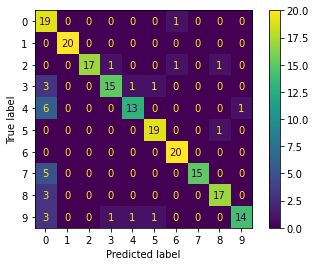

In [76]:
po1 = (np.argmax(p1, axis=1)).reshape(-1, 1)
disp1,score1=Acc_ConfMatric(tlb,po1)
disp1.plot(),print("Configuration1 Accuracy=",score1)

Configuration2 Accuracy= 87.5


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x228d87cb7f0>,
 None)

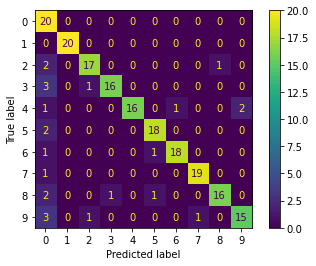

In [77]:
po2 = (np.argmax(p2, axis=1)).reshape(-1, 1)
disp2,score2=Acc_ConfMatric(tlb,po2)
disp2.plot(),print("Configuration2 Accuracy=",score2)

# What do you observe about increasing the number of epochs?

### When epochs increase accuracy increases since the number of iterations increase so the model learns more

Configuration3 Accuracy= 10.0


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x228d8951910>,
 None)

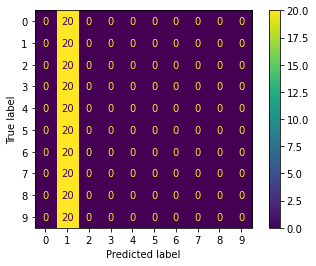

In [78]:
po3 = (np.argmax(p3, axis=1)).reshape(-1, 1)
disp3,score3=Acc_ConfMatric(tlb,po3)
disp3.plot(),print("Configuration3 Accuracy=",score3)

# What do you observe about the need for standardization?

### when we didnt standardize the accuracy decreased because neural networks works better when all features have the same scale and that occurs when you standardize


Configuration4 Accuracy= 10.0


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x228d8968160>,
 None)

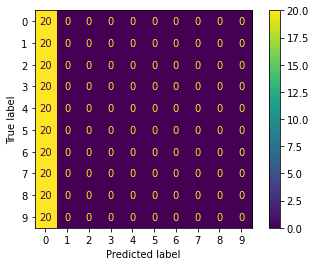

In [79]:
po4 = (np.argmax(p4, axis=1)).reshape(-1, 1)
disp4,score4=Acc_ConfMatric(tlb,po4)
disp4.plot(),print("Configuration4 Accuracy=",score4)

Configuration5 Accuracy= 82.5


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x228d8d36c40>,
 None)

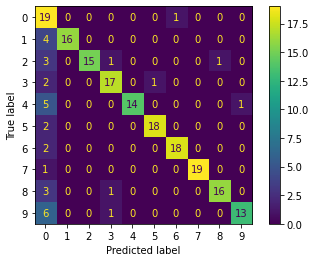

In [80]:
po5 = (np.argmax(p5, axis=1)).reshape(-1, 1)
disp5,score5=Acc_ConfMatric(tlb,po5)
disp5.plot(),print("Configuration5 Accuracy=",score5)

# What do you observe about changing the learning rate?

### when the learning rate is low the accuracy was high and when we increased the learning rate the accuracy decreased 

Configuration6 Accuracy= 73.5


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x228d8ad8c10>,
 None)

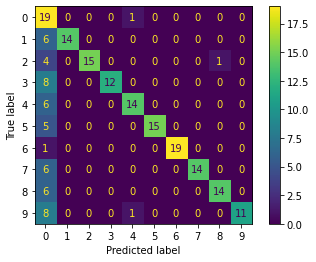

In [81]:
po6 = (np.argmax(p6, axis=1)).reshape(-1, 1)
disp6,score6=Acc_ConfMatric(tlb,po6)
disp6.plot(),print("Configuration6 Accuracy=",score6)

Configuration7 Accuracy= 83.0


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x228d8afa160>,
 None)

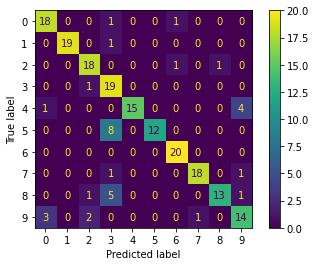

In [82]:
po7 = (np.argmax(p7, axis=1)).reshape(-1, 1)
disp7,score7=Acc_ConfMatric(tlb,po7)
disp7.plot(),print("Configuration7 Accuracy=",score7)

Configuration8 Accuracy= 42.0


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x228d939cd00>,
 None)

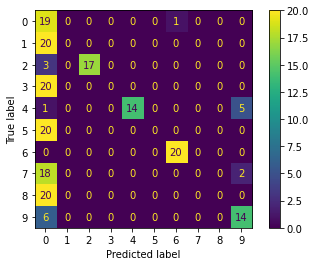

In [83]:
po8 = (np.argmax(p8, axis=1)).reshape(-1, 1)
disp8,score8=Acc_ConfMatric(tlb,po8)
disp8.plot(),print("Configuration8 Accuracy=",score8)

Configuration9 Accuracy= 40.0


(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x228d9528760>,
 None)

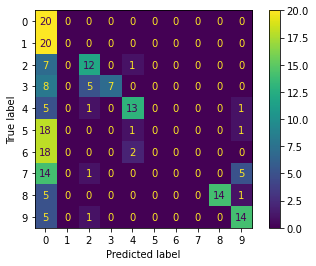

In [87]:
po9 = (np.argmax(p9, axis=1)).reshape(-1, 1)
disp9,score9=Acc_ConfMatric(tlb,po9)
disp9.plot(),print("Configuration9 Accuracy=",score9)

## What do you observe about the speed of training one epoch with batch size 1?

###  when we increase the batch size the process is faster and when we inrease the epochs the process is slower because there are many iterations done